# Views and CTEs on Databricks, Cont'

We are picking up from notebook [DE 3.2A - Views and CTEs on Databricks]($./DE 3.2A - Views and CTEs on Databricks) where we just reviewed the following two lists of tables<br/>
and views with the special note that our global temp view **`global_temp_view_dist_gt_1000`** was not included in the first list.

-sandbox



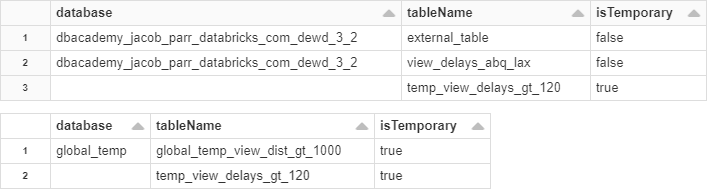

With the Notebook's state reset, we need to re-initialize some of our lesson-specific configuration.

Note: We will **NOT** be recreating the database for the second 1/2 of this lesson.

In [0]:
%run ../Includes/Classroom-Setup-3.2B

Python interpreter will be restarted.
Python interpreter will be restarted.




Predefined Paths:
  DA.paths.working_dir: dbfs:/user/chiraggoel@kpmg.com/dbacademy/dewd/3.2
  DA.paths.user_db:     dbfs:/user/chiraggoel@kpmg.com/dbacademy/dewd/3.2/3_2.db

Setup completed in 1 seconds


But, we do need to configure this session to use our database by default.

In [0]:
%sql
USE ${da.db_name};

Finally, run the following two cells to confirm that:
1. The table **`external_table`** still exists.
2. The view **`view_delays_abq_lax`** still exists.
3. The temp view **`temp_view_delays_gt_120`** does **NOT** exist.
3. The global temp view **`global_temp_view_dist_gt_1000`** does exist in the special **`global_temp`** database.

<img src="https://files.training.databricks.com/images/icon_hint_24.png"> Hint: If you were to go back to the previous notebook and run **`SHOW TABLES`**<br/>
again, all three tables and views from the current database will still be shown.

In [0]:
%sql
SHOW TABLES;

database,tableName,isTemporary
dbacademy_chiraggoel_kpmg_com_dewd_3_2,external_table,false
dbacademy_chiraggoel_kpmg_com_dewd_3_2,view_delays_abq_lax,false


In [0]:
%sql
SHOW TABLES IN global_temp;

database,tableName,isTemporary
global_temp,global_temp_view_dist_gt_1000,true


As mentioned previously, temp views are tied to a Spark session and as such are not accessible...
* After restarting a cluster
* After detaching and reataching to a cluster
* After installing a python package which in turn restarts the Python interpreter
* Or from another notebook

...with the special exception of global temporary views.

Global temp views behave much like other temporary views but differ in one important way. 

They are added to the **`global_temp`** database that exists on the **`cluster`**.

As long as the cluster is running, this database persists and any notebooks attached to the cluster can access its global temporary views.  
  
We can see this in action by running the follow cells:

In [0]:
%sql
SELECT * FROM global_temp.global_temp_view_dist_gt_1000;

date,delay,distance,origin,destination
01012355,0,1586,ABQ,JFK
01022355,158,1586,ABQ,JFK
01032355,0,1586,ABQ,JFK
01042355,0,1586,ABQ,JFK
01052355,0,1586,ABQ,JFK
01062355,0,1586,ABQ,JFK
01072359,14,1586,ABQ,JFK
01082358,-4,1586,ABQ,JFK
01092358,20,1586,ABQ,JFK
01102358,-2,1586,ABQ,JFK


Global temp views are "lost" when the cluster is restarted.

Take our word for it, don't do it now, but if you were to restart the cluster, the above select statement would fail because the table would no longer exist.

## Common Table Expressions (CTEs)
CTEs can be used in a variety of contexts. Below, are a few examples of the different ways a CTE can be used in a query. First, an example of making multiple column aliases using a CTE.

In [0]:
%sql
WITH flight_delays(
  total_delay_time,
  origin_airport,
  destination_airport
) AS (
  SELECT
    delay,
    origin,
    destination
  FROM
    external_table
)
SELECT
  *
FROM
  flight_delays
WHERE
  total_delay_time > 120
  AND origin_airport = "ATL"
  AND destination_airport = "DEN";

total_delay_time,origin_airport,destination_airport
172,ATL,DEN
128,ATL,DEN
178,ATL,DEN
122,ATL,DEN
125,ATL,DEN
310,ATL,DEN
135,ATL,DEN
224,ATL,DEN
133,ATL,DEN
814,ATL,DEN


Next, is an example of a CTE in a CTE definition.

In [0]:
%sql
WITH lax_bos AS (
  WITH origin_destination (origin_airport, destination_airport) AS (
    SELECT
      origin,
      destination
    FROM
      external_table
  )
  SELECT
    *
  FROM
    origin_destination
  WHERE
    origin_airport = 'LAX'
    AND destination_airport = 'BOS'
)
SELECT
  count(origin_airport) AS `Total Flights from LAX to BOS`
FROM
  lax_bos;

Total Flights from LAX to BOS
684


Now, here is an example of a CTE in a subquery.

In [0]:
%sql
SELECT
  max(total_delay) AS `Longest Delay (in minutes)`
FROM
  (
    WITH delayed_flights(total_delay) AS (
      SELECT
        delay
      FROM
        external_table
    )
    SELECT
      *
    FROM
      delayed_flights
  );

Longest Delay (in minutes)
995


We can also use a CTE in a subquery expression.

In [0]:
%sql
SELECT
  (
    WITH distinct_origins AS (
      SELECT DISTINCT origin FROM external_table
    )
    SELECT
      count(origin) AS `Number of Distinct Origins`
    FROM
      distinct_origins
  ) AS `Number of Different Origin Airports`;

Number of Different Origin Airports
255


Finally, here is a CTE in a **`CREATE VIEW`** statement.

In [0]:
%sql
CREATE OR REPLACE VIEW BOS_LAX 
AS WITH origin_destination(origin_airport, destination_airport) 
AS (SELECT origin, destination FROM external_table)
SELECT * FROM origin_destination
WHERE origin_airport = 'BOS' AND destination_airport = 'LAX';

SELECT count(origin_airport) AS `Number of Delayed Flights from BOS to LAX` FROM BOS_LAX;

Number of Delayed Flights from BOS to LAX
677


## Clean up 
We first drop the training database.

In [0]:
%sql
DROP DATABASE ${da.db_name} CASCADE;

Run the following cell to delete the tables and files associated with this lesson.

In [0]:
%python 
DA.cleanup()

Removing the working directory "dbfs:/user/chiraggoel@kpmg.com/dbacademy/dewd/3.2"


-sandbox
&copy; 2022 Databricks, Inc. All rights reserved.<br/>
Apache, Apache Spark, Spark and the Spark logo are trademarks of the <a href="https://www.apache.org/">Apache Software Foundation</a>.<br/>
<br/>
<a href="https://databricks.com/privacy-policy">Privacy Policy</a> | <a href="https://databricks.com/terms-of-use">Terms of Use</a> | <a href="https://help.databricks.com/">Support</a>